# Introducción a Python 

## Pandas - DataFrames

Los DataFrames son la estructura principal de Pandas. Se trata de una tabla bidimensional, aunque se pueden lograr representar más dimensiones usando *índices jerárquicos*.


### Índice
[Creación](#Creación)<br>
[Acceso a columnas y filas](#Acceso-a-columnas-y-filas)<br>
[Modificación, inserción y borrado de columnas y filas](#Modificación)<br>
[Índices](#Índices)<br>
[Estadísticas descriptivas](#Estadísticas-descriptivas)<br>
[Índices Jerárquicos](#Índices-Jerárquicos)<br>

<a name="Creación"></a>
### Creación

Ya hemos visto como cargar Dataframes desde un fichero CSV o Excel. 
Otra alternativa es a través de listas de listas. Esto es habitual cuando por ejemplo estamos recopilando la información mediante web scraping y la vamos acumulando en listas. En este caso habrá que indicar, además, los nombres de las columnas

In [1]:
import pandas as pd
from pandas import Series, DataFrame # para no tener que poner pd.

datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'])
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


El siguiente resultado, quizás inesperado, debe ser fácil de entender

In [2]:

ciudades = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 
         'Alicante', 'Málaga']
habitantes = [6507184, 5609350,  2547986,  1939887, 
          1838819, 1641121 ]

df2 = DataFrame([ciudades,habitantes],['ciudades','habitantes'])
df2

,0,1,2,3,4,5
ciudades,Madrid,Barcelona,Valencia,Sevilla,Alicante,Málaga
habitantes,6507184,5609350,2547986,1939887,1838819,1641121


También se puede crear a partir de un diccionario

In [3]:
datos = {'ciudades' : ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 
         'Alicante', 'Málaga'],
         'habitantes' : [6507184, 5609350,  2547986,  1939887, 
          1838819, 1641121 ]}
df = DataFrame(datos)
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


### Acceso a columnas y filas

Al acceder a una columna obtenemos una "serie", es decir una secuencia de datos todos ellos con su etiqueta (en principio un número)

In [4]:
df['ciudades']

0       Madrid
1    Barcelona
2     Valencia
3      Sevilla
4     Alicante
5       Málaga
Name: ciudades, dtype: object

In [5]:
print(type(df['ciudades']))

<class 'pandas.core.series.Series'>


Otra forma de acceder es con la notación . que solo puede usarse si el nombre de columna no contiene espacios ni símbolos especiales

In [6]:
df.ciudades

0       Madrid
1    Barcelona
2     Valencia
3      Sevilla
4     Alicante
5       Málaga
Name: ciudades, dtype: object

Para acceder por varias columnas a la vez usar dobles corchetes, y el resultado es un nuevo Dataframe

In [7]:
df[['ciudades','habitantes']]

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


Se puede acceder a las columnas, a los índices y a los valores

In [45]:
df.columns

Index(['ciudades', 'habitantes'], dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [10]:
df.values

array([['Madrid', 6507184],
       ['Barcelona', 5609350],
       ['Valencia', 2547986],
       ['Sevilla', 1939887],
       ['Alicante', 1838819],
       ['Málaga', 1641121]], dtype=object)

Sin embargo, no podemos acceder a la fila por posición directamente:

In [21]:
#Devuelve error por realizar un acceso incorrecto
df[0]

Sí podríamos usar df.values, que nos da todas las filas, aunque no es muy habitual

In [24]:
df.values[0]

array(['Madrid', 6507184], dtype=object)

En lugar de eso, utilizaremos `iloc` que recibe un entero como parámetro para acceder a la fila

In [56]:
df.iloc[0]

ciudades       Madrid
habitantes    6507184
Name: Capital, dtype: object

**Ejercicio 1**

Acceder a las 3 primeras filas. Pista: utilizar la misma notación que si fuera una lista

In [29]:
df.iloc[:3]

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986


Igualmente dentro de la fila  podemos acceder a la columna por posición

In [30]:
df.iloc[0][0], df.iloc[0][1] 

('Madrid', 6507184)

Otra forma de lograr lo mismo [fila,columna]

In [31]:
df.iloc[0,0], df.iloc[0,1]  

('Madrid', 6507184)

**Ejercicio 2** Seleccionar las filas de la 2 a la 4, ambas incluidas (comenzando en 0) y solo la primera columna (la número 0)

In [40]:
# solución
df.iloc[2:5,0]


2    Valencia
3     Sevilla
4    Alicante
Name: ciudades, dtype: object

**Acceso por índice.**

A menudo el índice es la posición sin más, con lo que la función iloc nos sirve. Sin embargo esto no es siempre así

In [41]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'],
               index=['Capital','Capital Com. Autonoma','Capital Com. Autonoma','Ciudad','Ciudad','Ciudad'])
df

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986
Ciudad,Sevilla,1939887
Ciudad,Alicante,1838819
Ciudad,Málaga,1641121


Vemos que iloc en este caso no vale

In [49]:
#El codigo da un error por realizar el acceso de forma incorrecta
df.iloc['Capital']

Si se quiere acceder por el índice se puede usar `loc`

In [50]:
df.loc['Capital']

ciudades       Madrid
habitantes    6507184
Name: Capital, dtype: object

In [51]:
df.loc['Ciudad']

,ciudades,habitantes
Ciudad,Sevilla,1939887
Ciudad,Alicante,1838819
Ciudad,Málaga,1641121


Si se quiere acceder por nombre de fila y columna podemos hacerlo seleccionando primero la fila:

In [ ]:
df.loc['Ciudad']["ciudades"]

O utilizar `loc`con la notación habitual fila, columna

In [ ]:
df.loc['Ciudad','ciudades']

<a name="Modificación"></a>
####Modificación, inserción y borrado de columnas y filas

**Ejercicio 3** ¿Qué hace el siguiente código?

In [60]:
# En este código creamos un Dataframe con los datos pasados en una lista de listas y modificamos sis ínfices
# mediante el uso del atributo index. Por último asignamos el valor 0 a toda la fila con índice 1 mediante el uso
# del atributo iloc

datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'],
               index=['a','b','c','d','e','f'])

df.iloc[1] = 0
df

,ciudades,habitantes
a,Madrid,6507184
b,0,0
c,Valencia,2547986
d,Sevilla,1939887
e,Alicante,1838819
f,Málaga,1641121


**Ejercicio 4** ¿Qué hace el siguiente código?

In [61]:
# Guardamos en todos los valores de la columna "superficie" el valor 0. Como la columna no existe cuando ejecutamos
# el comando, Python la crea de forma automática

df['superficie'] = 0
df

,ciudades,habitantes,superficie
a,Madrid,6507184,0
b,0,0,0
c,Valencia,2547986,0
d,Sevilla,1939887,0
e,Alicante,1838819,0
f,Málaga,1641121,0


Por tanto para crear una columna nos basta con "rellenarla" del valor que se desee. Luego veremos casos más complejos.


##### Eliminar filas y columnas
Una forma de eliminar columnas es seleccionar solo las que se quieren mantener 

In [65]:
df2 = df.loc[ : , ['ciudades', 'superficie'] ]
df2

,ciudades,superficie
a,Madrid,0
b,0,0
c,Valencia,0
d,Sevilla,0
e,Alicante,0
f,Málaga,0


O, directamente

In [68]:
df2 = df[['ciudades', 'superficie'] ]
df2

,ciudades,superficie
a,Madrid,0
b,0,0
c,Valencia,0
d,Sevilla,0
e,Alicante,0
f,Málaga,0


Las columnas se puede eliminar con `del` como en los diccionarios

In [85]:
if 'superficie' in df2:
    del df2['superficie'] 
df2

ciudades    0
Name: b, dtype: object

##### Filtros

Para *filtrar* filas lo normal es escribir una expresión booleana que solo cumplan las filas que queremos y acceder mediante este filtro

In [82]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'],
               index=['Capital','Capital Com. Autonoma','Capital Com. Autonoma','Ciudad','Ciudad','Ciudad'])
df

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986
Ciudad,Sevilla,1939887
Ciudad,Alicante,1838819
Ciudad,Málaga,1694089


Ciudades con más de 200000 habitantes

In [89]:
filtro = df.habitantes > 2000000
df2 = df[filtro]
df2

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986


Esto es importante pero bastante complejo. Para entenderlo veamos primero el filtro

In [90]:
filtro

Capital                   True
Capital Com. Autonoma     True
Capital Com. Autonoma     True
Ciudad                   False
Ciudad                   False
Ciudad                   False
Name: habitantes, dtype: bool

Aquí el índice no es importante, lo importante es que hay un True en cada fila que cumple la condición y un false en la que no.

Y Python permite usar una secuencia de Trues y False para acceder a elementos, devolviendo solo en los que hay Trues; por eso df[filtro] es equivalente a 

In [91]:
df[[True,True,True,False,False,False]]

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986


**Ejemplo** La función de strings `startswith` indica si un string empieza por una letra

In [92]:
s = "Barcerlona"
print(s.startswith("B"))
print(s.startswith("V"))

True
False


vamos a usarla para quedarnos solo con las ciudades que empiezan por M

In [93]:
filtro = df.ciudades.str.startswith("M")  # ciudades cuyo nombre empieza por M

df2 = df[filtro]
df2

,ciudades,habitantes
Capital,Madrid,6507184
Ciudad,Málaga,1694089


In [94]:
filtro

Capital                   True
Capital Com. Autonoma    False
Capital Com. Autonoma    False
Ciudad                   False
Ciudad                   False
Ciudad                    True
Name: ciudades, dtype: bool

**Detalle**: Fijarse en el df.ciudades**.str**.startswith("M"). Es necesario porque al ser startswith una función que solo vale para strings tenemos que "avisar" a Python de que la función es de tipo string, cuando por defecto las considera numéricas.

Si lo que queremos es saber cuántos elementos cumplen el filtro, nos basta con recordar que los Trues se corresponden con 1s, y los Falses con 0s.

In [95]:
sum(filtro)

2

**Ejercicio 4**

a) Cargar el fichero "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv" que está con codificación (`encoding`) "latin1" y dejarlo en un dataframe `df_paro`


 

In [96]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"
df_paro=pd.read_csv(url, encoding="latin1")
df_paro

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
1,Andalucía,2018,21.26
2,Andalucía,2017,24.43
3,Andalucía,2016,28.25
4,Andalucía,2015,29.83
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


b) Mostrar solo las filas de `df_paro` que corresponden al Periodo 2019

In [105]:
df_paro[df_paro["Periodo"]==2019]

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
18,Aragón,2019,9.93
36,Asturias,2019,13.14
54,Balears. Illes,2019,9.91
72,Canarias,2019,18.78
90,Cantabria,2019,11.18
108,Castilla y León,2019,11.20
126,Castilla - La Mancha,2019,16.56
144,Cataluña,2019,10.45
162,Comunitat Valenciana,2019,14.13


c) (más difícil) Mostrar solo las filas que corresponden al Periodo 2019 y tienen Total mayor de 15

In [108]:
filtro=(df_paro["Periodo"]==2019)&(df_paro["Total"]>15)
df_paro[filtro]

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
72,Canarias,2019,18.78
126,Castilla - La Mancha,2019,16.56
180,Extremadura,2019,23.48
234,Murcia,2019,16.08
306,Ceuta,2019,27.58
324,Melilla,2019,26.81


**Nota** Para combinar varias condiciones en un filtro se utilizan los operadores de bit: `&` en lugar de `and`, `|` en lugar de `or` y `~` en lugar de not.

**Ejemplo** 

Queremos todos los datos de `df_paro` salvo los de Andalucía

In [102]:
# método 1
filtro = df_paro["Comunidad"]!="Andalucía"
df_paro[filtro]

,Comunidad,Periodo,Total
18,Aragón,2019,9.93
19,Aragón,2018,11.11
20,Aragón,2017,11.37
21,Aragón,2016,13.53
22,Aragón,2015,14.60
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


In [103]:
# método 2, más raro 
filtro = df_paro["Comunidad"]=="Andalucía"
df_paro[~filtro]

,Comunidad,Periodo,Total
18,Aragón,2019,9.93
19,Aragón,2018,11.11
20,Aragón,2017,11.37
21,Aragón,2016,13.53
22,Aragón,2015,14.60
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


**Ejercicio 5** Consideramos este DataFrame

In [109]:
data = [[1,2,3,4,5,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,3,4,5,6,7],
       ]
df = DataFrame(data)
df

,0,1,2,3,4,5,6
0,1,2,3,4,5,6,7
1,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
3,1,2,0,0,0,6,7
4,1,2,3,4,5,6,7


Encontrar una expresión de cambiar todos los 0s por 9s (hay varias formas, alguna utilizando posiciones y alguna otra sin posiciones)

In [144]:
df.loc[1:3, 2:4] = 9
df

,0,1,2,3,4,5,6
0,1,2,3,4,5,6,7
1,1,2,9,9,9,6,7
2,1,2,9,9,9,6,7
3,1,2,9,9,9,6,7
4,1,2,3,4,5,6,7


#### Añadir filas

Veamos como [añadir filas](https://www.stackvidhya.com/add-row-to-dataframe/#:~:text=You%20can%20add%20rows%20to,append()) a un dataframe ya existente con append

In [220]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'])
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089


In [158]:
df = df.append( {'ciudades':'Cáceres', 'habitantes': 394151 }, ignore_index = True)
df

/tmp/ipykernel_149167/2743101497.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append( {'ciudades':'Cáceres', 'habitantes': 394151 }, ignore_index = True)


,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089
6,Cáceres,394151


Ahora añadimos una columna con la superficie

In [160]:
df["superficie"] = [8027, 7773, 10807,14036,5817,7306, 19868]
df

,ciudades,habitantes,superficie
0,Madrid,6507184,8027
1,Barcelona,5609350,7773
2,Valencia,2547986,10807
3,Sevilla,1939887,14036
4,Alicante,1838819,5817
5,Málaga,1694089,7306
6,Cáceres,394151,19868


Y obtenemos la densidad:

In [161]:
df["densidad"] = df["habitantes"]/df["superficie"]
df

,ciudades,habitantes,superficie,densidad
0,Madrid,6507184,8027,810.662016
1,Barcelona,5609350,7773,721.645439
2,Valencia,2547986,10807,235.771815
3,Sevilla,1939887,14036,138.207965
4,Alicante,1838819,5817,316.111226
5,Málaga,1694089,7306,231.876403
6,Cáceres,394151,19868,19.838484


Finalmente, ordenamos por nombre de ciudad con `sort_values`. Nótese el uso de `inplace=True` para que modifique el dataframe y no devuelva una copia

In [162]:
df.sort_values(by='ciudades', ascending=True, inplace=True)
df

,ciudades,habitantes,superficie,densidad
4,Alicante,1838819,5817,316.111226
1,Barcelona,5609350,7773,721.645439
6,Cáceres,394151,19868,19.838484
0,Madrid,6507184,8027,810.662016
5,Málaga,1694089,7306,231.876403
3,Sevilla,1939887,14036,138.207965
2,Valencia,2547986,10807,235.771815


### Estadísticas descriptivas

Esta es la lista de valores descriptivos asociados a cualquier columna (aunque muchos solo tienen sentido si la columna es numérica) 
    
    
|Method  | Description|
|--------|------------|
| count  | Number of non-NA values|
|describe|Compute set of summary statistics for Series or each DataFrame column|
|min, max| Compute minimum and maximum values|
|argmin, argmax |Compute index locations (integers) at which minimum or maximum value obtained, respectively|
|idxmin, idxmax |Compute index values at which minimum or maximum value obtained, respectively|
|quantile |Compute sample quantile ranging from 0 to 1|
|sum |Sum of values|
|mean| Mean of values|
|median | Arithmetic median (50% quantile) of values |
|mad |Mean absolute deviation from mean value|
|var |Sample variance of values|
|std |Sample standard deviation of values|
|skew| Sample skewness (3rd moment) of values|
|kurt| Sample kurtosis (4th moment) of values|
|cumsum |Cumulative sum of values|
|cummin, cummax |Cumulative minimum or maximum of values, respectively|
|cumprod |Cumulative product of values|
|diff | Compute 1st arithmetic difference (useful for time series)|
|pct_change | Compute percent changes |

Veámoslo con los datos de los tweets

In [181]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweet_feat_renta.csv"
import pandas as pd
df = pd.read_csv(fileIn)
df.columns

Index(['id', 'screen_name', 'text', 'location', 'localidad', 'provincia',
       'distrito', 'seccion', 'hora', 'verified', 'friends_count', 'followers',
       'tweets', ''¡'', ''!'', ''¿'', ''?'', 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment'],
      dtype='object')

**Ejercicio 6** Solo estamos interesados en las columnas desde la 9 (empezando en 0) hasta el final.  Llamar al dataframe resultante df1

In [183]:
df1=df[['verified', 'friends_count', 'followers',
       'tweets', 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment']]
df1

,verified,friends_count,followers,tweets,URLs,adjetivos,emojis,gerundio,hashtags,infinitivo,...,tiempo condicional,tiempo futuro,tiempo pasado,tiempo presente,verbos,cambio1518,mediana,rentapais,rentacom,sentiment
0,0,1661,1059,34809,0,3,0,0,0,0,...,0,0,0,2,2,9,17850.0,73.5,48.0,-0.735980
1,0,1661,1059,34809,0,1,0,0,0,5,...,0,0,2,3,10,9,17850.0,73.5,48.0,-0.670090
2,0,1661,1059,34809,0,3,0,1,0,2,...,0,0,0,1,4,9,17850.0,73.5,48.0,0.926692
3,0,1661,1059,34809,1,0,0,0,3,0,...,0,0,0,1,1,9,17850.0,73.5,48.0,-0.888506
4,0,1661,1059,34809,0,0,0,0,0,0,...,0,0,0,6,7,9,17850.0,73.5,48.0,-0.416854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80015,0,1844,643,2108,4,2,0,0,8,0,...,0,0,0,3,3,-5,12950.0,21.5,10.0,0.000000
80016,0,2050,1012,11556,0,0,1,0,0,1,...,0,0,0,3,5,11,14350.0,37.0,12.0,0.878134
80017,0,173,182,179,1,0,0,0,0,0,...,0,0,0,0,0,16,15050.0,44.5,36.0,0.960855
80018,0,408,2173,2158,1,0,0,0,0,0,...,0,0,0,0,0,9,24850.0,94.5,92.5,0.785475


Ahora vemos las estadísticas generales

In [184]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
verified,80020.0,0.013309,0.114596,0.000000,0.000000,0.000000,0.000000,1.0
friends_count,80020.0,1369.166758,1476.392180,0.000000,425.000000,774.000000,2018.000000,12824.0
followers,80020.0,3305.089728,12274.078604,0.000000,390.000000,904.000000,2015.000000,242511.0
tweets,80020.0,61150.688253,76154.534903,7.000000,10063.000000,33481.000000,83351.000000,619633.0
URLs,80020.0,0.572444,0.553277,0.000000,0.000000,1.000000,1.000000,6.0
adjetivos,80020.0,0.859685,1.170761,0.000000,0.000000,0.000000,1.000000,22.0
emojis,80020.0,0.745389,2.065471,0.000000,0.000000,0.000000,1.000000,117.0
gerundio,80020.0,0.115371,0.365998,0.000000,0.000000,0.000000,0.000000,5.0
hashtags,80020.0,0.746551,1.956394,0.000000,0.000000,0.000000,1.000000,30.0
infinitivo,80020.0,0.468383,0.869573,0.000000,0.000000,0.000000,1.000000,10.0


Nos sorprende un poco la variable tweets ¿qué usuario tiene el máximo?

In [185]:
df1.tweets.max()

619633

In [ ]:
filtro = df.tweets == df.tweets.max()
df[filtro]

##### Histogramas
Histograma de la mediana de rentas en la zona:

<AxesSubplot:>

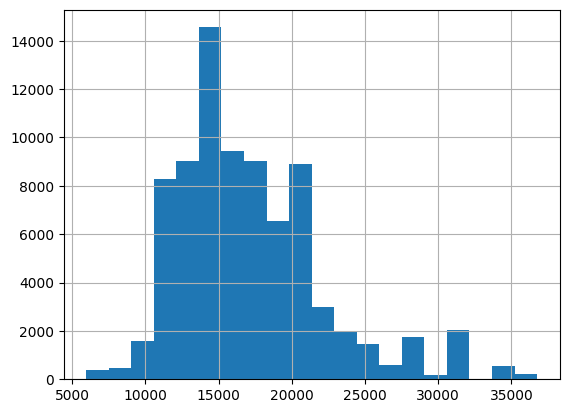

In [190]:
df["mediana"].hist(bins=20)

<AxesSubplot:>

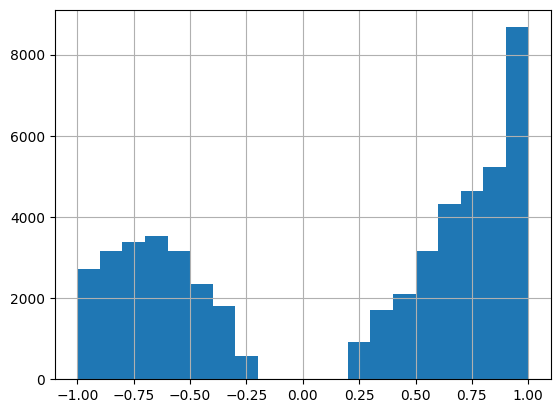

In [191]:
df[df["sentiment"]!=0].sentiment.hist(bins=20)

##### Número de valores distintos
Queremos ver cuántos usuarios distintos hay, es decir cuántos valores distintos toma la columna screen_name. Esto nos lo dará la función `unique`

In [192]:
l = df.screen_name.unique()
l

array(['heryartes', 'sevilolo1974', 'ojosdeltigre', ..., 'RococoDecora',
       'sr_boca', 'EdixonTech'], dtype=object)

In [193]:
print(f"Hay {len(l)} usuarios distintos")

Hay 1252 usuarios distintos


##### Frecuencia de los valores

Número de valores diferentes y frecuencia de cada valor para el campo 
`verified` con `value_counts`

In [204]:
df.verified.value_counts()

0    78955
1     1065
Name: verified, dtype: int64

Tweets repetidos (campo text)

In [201]:
df["text"].duplicated().sum()

607


##### Ejemplo (con algunas cosas nuevas)

Comprobar si el sentimiento medio de los tweets de los usuarios verificados es mejor que el de los usuarios no verificados

In [205]:
grupo = df['sentiment'].groupby(df['verified'])
grupo.mean()

verified
0    0.110699
1    0.178736
Name: sentiment, dtype: float64

Ver si los tweets de los usuarios que viven en zonas de renta más alta expresan un sentimiento más positivo que los de las zonas de renta más baja.

In [206]:
media = df.mediana.mean()
std = df.mediana.std()
rentaalta =  df[df.mediana > media + 0.5*std]
rentabaja = df[df.mediana < media  - 0.5*std]

In [207]:
len(rentaalta), len(rentabaja)

(20728, 26846)

In [208]:
rentaalta.sentiment.mean(), rentabaja.sentiment.mean()

(0.14253522115013506, 0.11720796952991135)


**Correlaciones**

Se puede hacer la correlación de dos columnas o de todas ellas. Vamos a obtenerlas para los contaminantes

In [209]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/madrid/contaminacionPlazaElipticaLargo.csv"
df_cont = pd.read_csv(fileIn)
df_cont.columns

Index(['ANO', 'MES', 'DIA', 'HORA', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx',
       'O3', 'fechaH', 'fecha', 'festivo'],
      dtype='object')

In [210]:
contaminantes = ['CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx','O3']
c = df_cont[contaminantes].corr()
c

,CO,NO,NO2,PM2.5,PM10,NOx,O3
CO,1.000000,0.877149,0.793013,0.543806,0.509512,0.896860,-0.561398
NO,0.877149,1.000000,0.796917,0.533687,0.492140,0.981866,-0.511486
NO2,0.793013,0.796917,1.000000,0.543910,0.534104,0.891199,-0.617220
PM2.5,0.543806,0.533687,0.543910,1.000000,0.880041,0.572038,-0.399222
PM10,0.509512,0.492140,0.534104,0.880041,1.000000,0.537852,-0.344448
NOx,0.896860,0.981866,0.891199,0.572038,0.537852,1.000000,-0.560935
O3,-0.561398,-0.511486,-0.617220,-0.399222,-0.344448,-0.560935,1.000000


Una forma gráfica de mostrar correlaciones

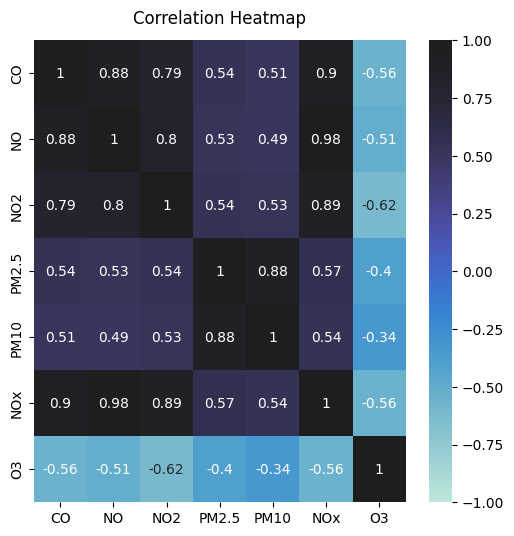

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlaciones = round(c,2)

plt.figure(figsize=(6, 6),dpi=100)
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display
#the correlation values on the heatmap.
heatmap = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=True, center=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Hay muchos otros tipos de gráficos que se pueden hacer, por ejemplo [aquí](https://seaborn.pydata.org/tutorial/categorical.html) hay varios ejemplos de relaciones entre variables categóricas y continuas

In [213]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweet_feat_renta.csv"
import pandas as pd
df = pd.read_csv(fileIn)
df.columns

Index(['id', 'screen_name', 'text', 'location', 'localidad', 'provincia',
       'distrito', 'seccion', 'hora', 'verified', 'friends_count', 'followers',
       'tweets', ''¡'', ''!'', ''¿'', ''?'', 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment'],
      dtype='object')

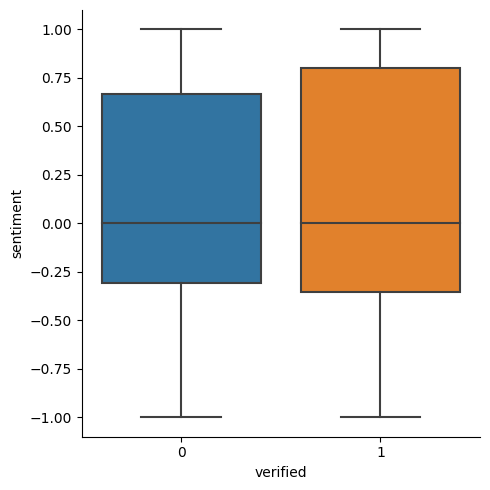

In [214]:
sns.catplot(x="verified", y="sentiment",  kind="box", data=df)

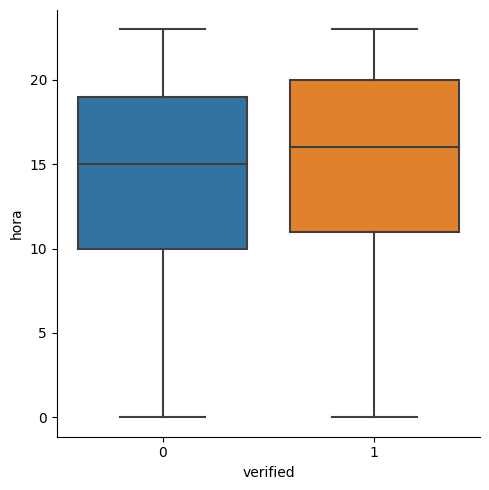

In [215]:
sns.catplot(x="verified", y="hora", kind="box", data=df)

<AxesSubplot:xlabel='hora', ylabel='sentiment'>

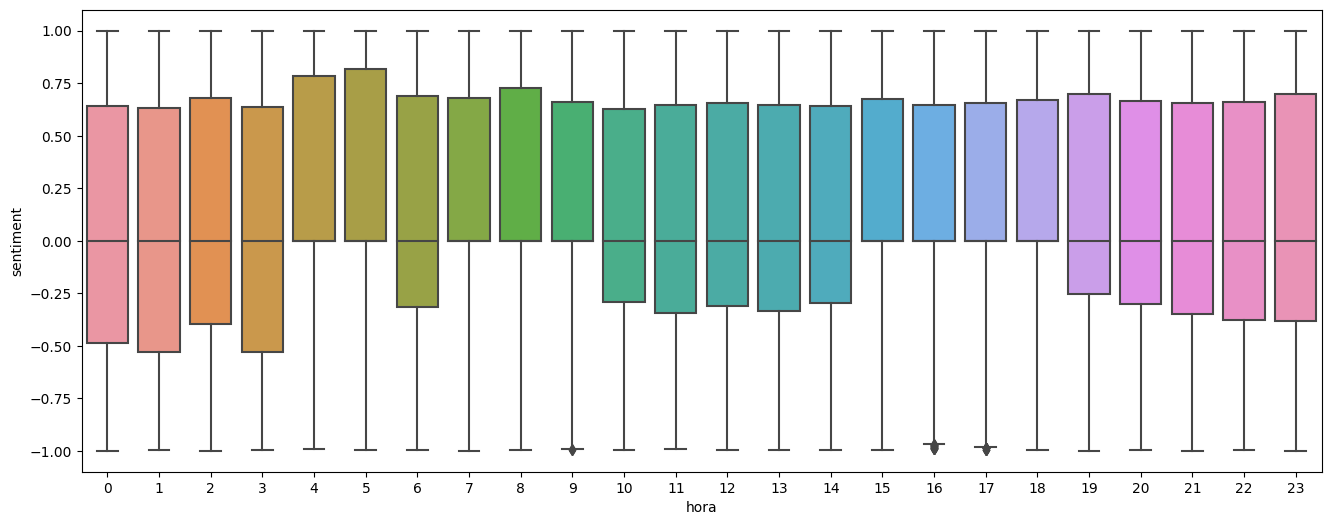

In [216]:
dfh = df[(df.hora>=0)]
fig, ax = plt.subplots(figsize=(16, 6),dpi=100)
sns.boxplot(ax=ax, x="hora", y="sentiment", data=df)

### Índices

Ya hemos visto unas cuantas cosas sobre los índices

- Se usan para referenciar fila
- Se puede acceder con loc
- Hay índices de tipos diversos

Algunas cosas nuevas:



In [221]:
import pandas as pd
import numpy as np
data = [[1,2,3,4,5,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,3,4,5,6,7],
       ]
df1 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = ['i'+chr(ord('a')+i) for i in range(len(data))])
df2 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df3 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [np.random.randint(3) for i in range(len(data),0,-1)])


In [222]:
print(df1,df2,df3,sep="\n")

    a  b  c  d  e  f  g
ia  1  2  3  4  5  6  7
ib  1  2  0  0  0  6  7
ic  1  2  0  0  0  6  7
id  1  2  0  0  0  6  7
ie  1  2  3  4  5  6  7
   a  b  c  d  e  f  g
4  1  2  3  4  5  6  7
3  1  2  0  0  0  6  7
2  1  2  0  0  0  6  7
1  1  2  0  0  0  6  7
0  1  2  3  4  5  6  7
   a  b  c  d  e  f  g
0  1  2  3  4  5  6  7
0  1  2  0  0  0  6  7
0  1  2  0  0  0  6  7
2  1  2  0  0  0  6  7
1  1  2  3  4  5  6  7


A menudo interesa asegurarse de si es monótono creciente.

In [223]:
df1.index.is_monotonic, df2.index.is_monotonic, df3.index.is_monotonic

(True, False, False)

También de si hay valores repetidos

In [224]:
df1.index.is_unique, df2.index.is_unique, df3.index.is_unique

(True, True, False)

En caso de que no sea único podemos querer obtener los valores distintos

In [225]:
df3.index.unique()

Int64Index([0, 2, 1], dtype='int64')

Una de las operaciones más básicas, que haremos a menudo es reindexar:

In [226]:

df4 = df2.reindex([1,2,3,4,5])
df4


,a,b,c,d,e,f,g
1,1.0,2.0,0.0,0.0,0.0,6.0,7.0
2,1.0,2.0,0.0,0.0,0.0,6.0,7.0
3,1.0,2.0,0.0,0.0,0.0,6.0,7.0
4,1.0,2.0,3.0,4.0,5.0,6.0,7.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- ¿Por qué necesitamos hacer df4 y no queda modificado df2? Porque los índices son inmutables. Para que se cambie en el propio DataFram usar el argumento `inplace=True`

- ¿Por qué aparecen los NaN? (pensar...)


In [228]:
df4 = df2.reindex([1,2,3,4,5],fill_value=0)
df4

,a,b,c,d,e,f,g
1,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
3,1,2,0,0,0,6,7
4,1,2,3,4,5,6,7
5,0,0,0,0,0,0,0


También vale para columnas

In [229]:
df4 = df2.reindex(columns=[1,2,3,4,5],fill_value=-1)
df4

,1,2,3,4,5
4,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1
0,-1,-1,-1,-1,-1


Esto es un poco desastre. ¿No podemos solo cambiar los índices sin cargarnos todo? La solución es `reset_index()`

In [230]:
df2 = DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df2

,a,b,c,d,e,f,g
4,1,2,3,4,5,6,7
3,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
1,1,2,0,0,0,6,7
0,1,2,3,4,5,6,7


In [231]:
df2.reset_index(inplace=True)
df2

,index,a,b,c,d,e,f,g
0,4,1,2,3,4,5,6,7
1,3,1,2,0,0,0,6,7
2,2,1,2,0,0,0,6,7
3,1,1,2,0,0,0,6,7
4,0,1,2,3,4,5,6,7


El índice se 'guarda' en una columna `index`. Se puede evitar utilizando `drop=True`

In [232]:
df2 = DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df2.reset_index(drop=True, inplace=True)
df2

,a,b,c,d,e,f,g
0,1,2,3,4,5,6,7
1,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
3,1,2,0,0,0,6,7
4,1,2,3,4,5,6,7


Si no se quiere que el índice empiece en 0, ni tampoco que se pierda información, se puede acceder directamente a .index o a .columns

In [233]:
df2.index = ['a','b','c','d','e']
df2

,a,b,c,d,e,f,g
a,1,2,3,4,5,6,7
b,1,2,0,0,0,6,7
c,1,2,0,0,0,6,7
d,1,2,0,0,0,6,7
e,1,2,3,4,5,6,7


Si se accede directamente a `index` se deben poner tantos elementos como filas hay, si no se obtendrá un error

In [235]:
#df2.index = ['a','b','c','d']

**Ej.** Queremos sumar dos series:

In [236]:
a = Series([1,2,3,4],['a','b','c','d'])
b = Series([1,2,3,4],[10,20,30,40])

Sin embargo:

In [ ]:
a+b

¿qué podemos hacer?

In [237]:
a.reset_index(drop=True)+b.reset_index(drop=True)

0    2
1    4
2    6
3    8
dtype: int64

Se pueden eliminar filas a partir del índice con drop()

In [ ]:
c = a.reset_index(drop=True)+b.reset_index(drop=True)
print(c,type(c))
d = c.drop([1,2])
print(d)

In [ ]:
df = DataFrame(np.arange(16).reshape((4, 4)), 
               columns=['c'+str(i) for i in range(4)],
               index = ['f'+str(i) for i in range(4)])
df

In [ ]:
df.drop(['c1','c2'],axis=1,inplace=True)
df

In [ ]:
df = DataFrame(np.arange(16).reshape((4, 4)), 
               columns=['c'+str(i) for i in range(4)],
               index = ['f'+str(i) for i in range(4)])
df.drop(['f1','f2'],axis=0,inplace=True)
df

Como ya hemos visto las operaciones aritméticas utilizan los índices comunes. Esto vale tanto para filas como para columnas

In [ ]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

print(df1)
print(df2)

In [ ]:
df1+df2

Para evitarlo se puede añadir 0 para evitar el valor `NaN`

In [ ]:
df1.add(df2,fill_value=0)

Análogamente existen funciones `add`, `sub`, `div`, `mul`

La siguiente operación ya no debe sorprendernos:

In [ ]:
f = df1.loc[1,:]
print(df1,"\n",f,"\n",df1-f,sep="")



Si lo que queremos es restar sobre las columnas

In [ ]:
f.index = range(len(f))
df1.sub(f,axis=0)

Si lo que se quiere es ordenar los índices, no cambiarlo, se puede utilizar `sort_index()`

In [ ]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), 
                columns=list('dfab'),index=list('431'))
df1

In [ ]:
df1.sort_index(inplace=True)
df1

### Índices Jerárquicos

Son índices de tipo *MultiIndex* 

In [ ]:
data = Series(np.random.randint(4,size=10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])

data

In [ ]:
data.index

En los índices jerárquicos se pueden hacer selecciones parciales:

In [ ]:
data['c']

Una serie con multiíndices puede convertirse en un DataFrame un *unstack()*, mientras que la operación contraria es *stack()*.

In [ ]:
data.unstack()

Las estadísticas se pueden hacer a distintos niveles en este tipo de índices

In [ ]:
data.sum(level=0)

In [ ]:
data.sum(level=1)